In [28]:
import pandas as pd
import psycopg2
import numpy as np
import os
from config import username
from config import password

# SQL Alchemy
from sqlalchemy import create_engine

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('..\data\employees.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   emp_no        300024 non-null  int64 
 1   emp_title_id  300024 non-null  object
 2   birth_date    300024 non-null  object
 3   first_name    300024 non-null  object
 4   last_name     300024 non-null  object
 5   sex           300024 non-null  object
 6   hire_date     300024 non-null  object
dtypes: int64(1), object(6)
memory usage: 16.0+ MB


In [4]:
emp_df = df.groupby('emp_no').count()
emp_df

,emp_title_id,birth_date,first_name,last_name,sex,hire_date
emp_no,,,,,,
10001,1,1,1,1,1,1
10002,1,1,1,1,1,1
10003,1,1,1,1,1,1
10004,1,1,1,1,1,1
10005,1,1,1,1,1,1
...,...,...,...,...,...,...
499995,1,1,1,1,1,1
499996,1,1,1,1,1,1
499997,1,1,1,1,1,1


In [5]:
emp_df[emp_df['sex'] > 1]

,emp_title_id,birth_date,first_name,last_name,sex,hire_date
emp_no,,,,,,


In [6]:
df2 = pd.read_csv('..\data\dept_emp.csv')
df2
# dep_emp

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003
...,...,...
331598,499995,d004
331599,499996,d004
331600,499997,d005
331601,499998,d002


In [7]:
dep_emp = df2.groupby(['emp_no']).count()
doppelganger = pd.DataFrame(dep_emp[dep_emp['dept_no'] > 1])
doppelganger


,dept_no
emp_no,
10010,2
10018,2
10029,2
10040,2
10050,2
...,...
499955,2
499964,2
499975,2


In [8]:
doppelganger.reset_index(inplace = True)
doppelganger

,emp_no,dept_no
0,10010,2
1,10018,2
2,10029,2
3,10040,2
4,10050,2
...,...,...
31574,499955,2
31575,499964,2
31576,499975,2
31577,499983,2


In [25]:
# for i in range(0,60):
df_clean = pd.DataFrame(df2[df2['emp_no'] == doppelganger['emp_no'][i]])
# if (df_clean['dept_no'] == 'd004') & (df_clean['dept_no'] == 'd008'):
#     df_clean['emp_no']
df_clean['emp_no'].unique()

array([10577], dtype=int64)

In [10]:
df2[df['dept_']]

KeyError: 'dept_'

In [14]:
mm = df_clean.groupby('emp_no').count()
mm[mm['dept_no'] > 1]

,dept_no
emp_no,
10010,2


In [15]:
df[df['emp_no'] == 499992]

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
97518,499992,s0001,10/12/1960,Siamak,Salverda,F,5/10/1987


In [17]:
df3 = df2.drop_duplicates(subset='emp_no', keep = 'last')
df3

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003
...,...,...
331598,499995,d004
331599,499996,d004
331600,499997,d005
331601,499998,d002


In [14]:
# password = os.environ['PASSWORD']
# secret_key = os.environ.get('SECRET_KEY')
# database_url = os.environ.get('DATABASE_URL','postgresql://')

KeyError: 'PASSWORD'

In [9]:
census_database_path = "employee.sql"
engine = create_engine(f"postgresql://postgres:bpIbu2017@@localhost/Employee_db")
conn = engine.connect()

In [19]:
employee_df = pd.read_sql("SELECT * FROM employees_db", conn)
employee_df[(employee_df['dept_name'] == 'Development') & (employee_df['dept_name'] == 'Sales') ]

,emp_no,title,dept_name,first_name,last_name,birth_date,sex,hire_date,salary


In [21]:
dep_emp = df2.groupby('emp_no').count()
doppelganger = pd.DataFrame(dep_emp[dep_emp['dept_no'] > 1])
doppelganger.index

KeyError: 'dept_no'

Text(0.5, 0, 'Salary Range')

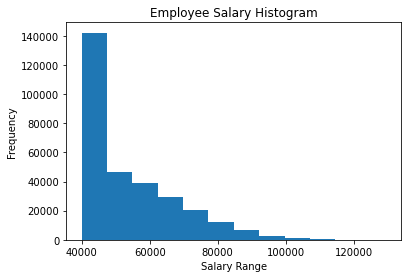

In [22]:
employee_df['salary'].plot.hist(bins=12)
plt.title('Employee Salary Histogram')
plt.xlabel("Salary Range")

In [29]:
title_df=employee_df.groupby('title').mean()
title_df[['salary']]

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


Text(0, 0.5, 'Salary')

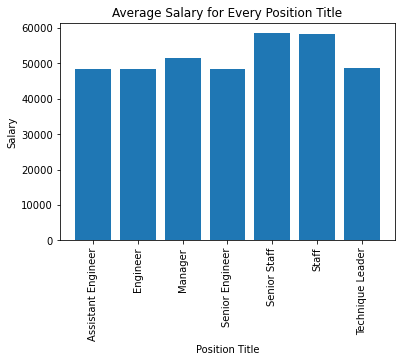

In [25]:
xdata=np.arange(len(title_df))
xdata
xticks = title_df.index
plt.bar(xdata,title_df['salary'])
plt.xticks(ticks = xdata, labels = xticks, rotation = 90)
plt.title('Average Salary for Every Position Title')
plt.xlabel('Position Title')
plt.ylabel('Salary')
# plt.show()

In [23]:
employee_df[employee_df['emp_no'] == 499942]

,emp_no,title,dept_name,first_name,last_name,birth_date,sex,hire_date,salary
37455,499942,Technique Leader,Development,April,Foolsday,1963-01-10,F,1997-02-10,40000
